In [56]:
%reload_ext autoreload
%autoreload 2
from graphe import *
from model_checking import *

In [117]:
g = graphe("exemples/6faces.mdp")
gr = graphe("exemples/manchot2bras.mdp")
gr2 = graphe("exemples/exreward.mdp")
gprof1 = graphe("exemples_prof/fichier1-ex.mdp")
gprof2 = graphe("exemples_prof/fichier2-mc.mdp")
gprof3 = graphe("exemples_prof/fichier3-mdp.mdp")
gprof4 = graphe("exemples_prof/fichier4-prob.mdp")
gex = graphe("exemples/ex.mdp")
gex_boucle = graphe("exemples/ex.mdp")
gex_boucle.boucleMDP()
gex2 = graphe("exemples/ex2.mdp")

Erreur de vérification de exemples/6faces.mdp :
Noeud terminal T1 sans aucune transition : ajout d'une boucle pour l'état
Noeud terminal T2 sans aucune transition : ajout d'une boucle pour l'état
Noeud terminal T3 sans aucune transition : ajout d'une boucle pour l'état
Noeud terminal T4 sans aucune transition : ajout d'une boucle pour l'état
Noeud terminal T5 sans aucune transition : ajout d'une boucle pour l'état
Noeud terminal T6 sans aucune transition : ajout d'une boucle pour l'état

Erreur de vérification de exemples_prof/fichier4-prob.mdp :
Noeud terminal T sans aucune transition : ajout d'une boucle pour l'état
F état non défini : état ajouté dans self.states
c action non défini : action ajoutée dans self.actions
La transition de S0 vers S1 existe avec ET sans action : la chaîne est acceptée, mais veuillez changer la structure

Erreur de vérification de exemples/ex2.mdp :
S1 état non défini : état ajouté dans self.states
c action non défini : action ajoutée dans self.actions
La 

# Algorithmes de Model-checking

## Model-checking probabiliste

Calcule les probabilités d'atteindre certains états $S_1$ à partir de tous les états $S_0$

Chaîne de Markov : Pour calculer le pctl par résolution de $A . x = b$ :

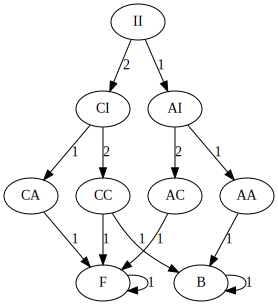

In [125]:
gprof2.visualizeGraphe() # Chaîne utilisée pour l'exemple

In [121]:
pctl_finally(gprof2,["B","F"])

,II,CI,AI,CC
P,1.0,1.0,1.0,1.0


In [122]:
pctl_finally(gprof2,["B"])

,II,CI,AI,CC
P,0.333333,0.333333,0.333333,0.5


Version itérative :

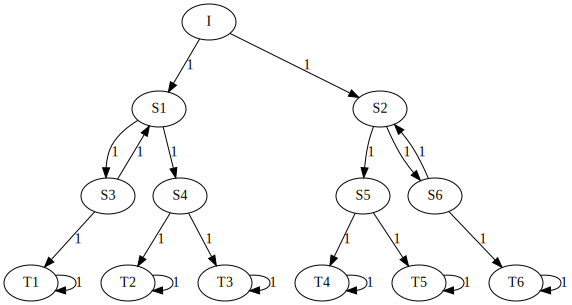

In [123]:
g.visualizeGraphe()

In [9]:
pctl_finally_max_bound(g,["T1","T2"], 50)

,I,S1,S3,S4
P,0.333333,0.666667,0.833333,0.5


In [124]:
pctl_finally_max_bound(g,["T1","T6"], 50)

,I,S1,S2,S3,S6
P,0.333333,0.333333,0.333333,0.666667,0.666667


MDP : Pour calculer le pctl par résolution de $A.x \leq b$

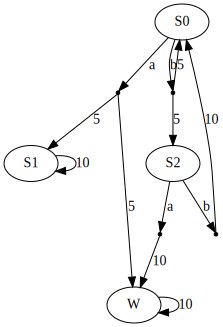

In [126]:
gprof3.visualizeGraphe()

In [128]:
pctl_mdp(gprof3, ["S1"])

,S0,S2
P,0.5,0.5


In [130]:
pctl_mdp(gprof3, ["W"])

,S0,S2
P,1.0,1.0


## Model-checking statistique
### SMC Quantitatif : méthode de Monte-Carlo

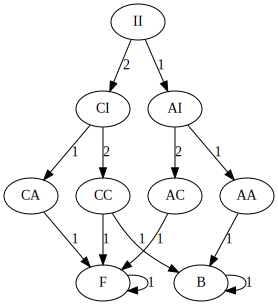

In [131]:
gprof2.visualizeGraphe()

In [133]:
montecarlo_SMC(gprof2) 

,II,CI,AI,CC,CA,AC,AA,F,B
P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661895,0.331815


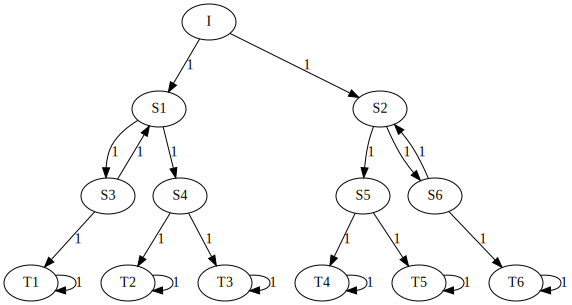

In [136]:
g.visualizeGraphe()

In [137]:
montecarlo_SMC(g) 

,I,S1,S2,S3,S4,S5,S6,T1,T2,T3,T4,T5,T6
P,0.0,0.027326,0.027001,0.0,0.0,0.0,0.0,0.154739,0.150618,0.162655,0.151377,0.159944,0.158426


### SMC qualitatif

In [78]:
def prop1(s):
    return (s=="F")

def prop2(s):
    return (s=="B")

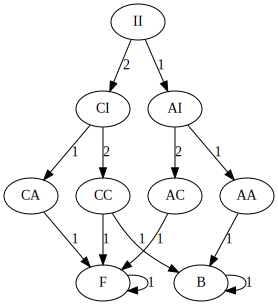

In [138]:
gprof2.visualizeGraphe()

In [80]:
sprt_SMC(gprof2, prop1) # Arriver dans "F"

i = 329 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : -4.600613480575412
H0 : gamma >= 0.5 accepté


True

In [81]:
sprt_SMC(gprof2, prop2) # Arriver dans "B"

i = 351 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : 4.600613480575412
H1 : gamma < 0.5 accepté


False

In [140]:
sprt_SMC(gprof2, prop2, theta = 0.25) # Arriver dans "B", par calcul formel P = 0.33

i = 299 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : -4.618086783606103
H0 : gamma >= 0.25 accepté


True

### SMC pour les MDP :

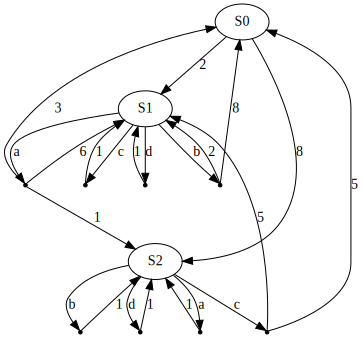

In [91]:
gex_boucle.visualizeGraphe()

In [151]:
def phi(s):
    return (s=="S2")

In [152]:
smc_mdp(gex_boucle, h=0.5, eps=0.5 , N=15, L=15, p=0.5, tau=0.5, phi=phi, theta=0.5) # Besoin d'avoir une transition pour toutes les actions !

i = 185 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : -4.600613480575412
H0 : gamma >= 0.5 accepté


True

In [153]:
smc_mdp(gex_boucle, h=0.5, eps=0.5 , N=15, L=15, p=0.5, tau=0.5, phi=phi, theta=0.98)

i = 2223 itérations
A : 4.59511985013459, B : -4.59511985013459 et Rm : 4.98703057729584
H1 : gamma < 0.98 accepté


False

## Méthode à itérations : 

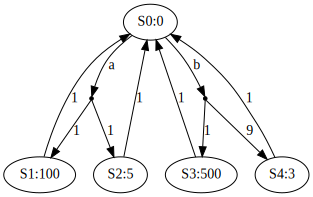

In [154]:
gr.visualizeGraphe()

In [155]:
iter_valeurs(gr, gamma = 0.5)

,S0,S1,S2,S3,S4
Valeur,35.124756,117.549512,22.549512,517.549512,20.549512
Action,b,a,a,a,a


In [156]:
iter_politique(gr, gamma = 0.5)

,S0,S1,S2,S3,S4
Valeur,35.133333,117.566667,22.566667,517.566667,20.566667
Action,b,a,a,a,a


## Algorithmes d'apprentissage par renforcerment

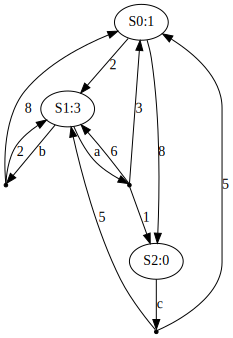

In [157]:
gr2.visualizeGraphe()

Méthode de Monte-Carlo : 

In [158]:
montecarlo_rl(gr2, [0,0,2], N = 150)

,S0,S1,S2
V_mean,2.7224,2.472,1.548


Différence temporelle :

In [207]:
td_rl(gr2, [0,0,2], alpha = 0.8, gamma = 0.9, k = 100, N = 150)

,S0,S1,S2
V_mean,11.945279,15.16944,12.019462


SARSA : 

In [167]:
sarsa_rl(gr2, T_tot=10000, gamma=0.5)

           a         b         c
S0  2.192138  2.176602  2.162365
S1  3.353887  2.542437  0.000000
S2  0.000000  0.000000  3.271778


,S0,S1,S2
Action,a,a,c


Q-Learning :

In [172]:
qlearning_rl(gr2, T_tot=1000, gamma=0.5)

           a         b         c
S0  2.148055  2.127945  2.165826
S1  4.738343  4.277573  0.000000
S2  0.000000  0.000000  1.677618


,S0,S1,S2
Action,c,a,c


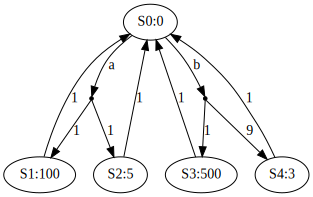

In [173]:
gr.visualizeGraphe()

In [191]:
qlearning_rl(gr, T_tot=10000, gamma=0.4)

             a           b
S0   25.074503   27.199835
S1  111.017958  111.005365
S2   16.016966   15.932745
S3  511.178586  511.079119
S4   14.051025   13.985640


,S0,S1,S2,S3,S4
Action,b,a,a,a,a
